In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
%matplotlib inline
import xgboost as xgb

import fun1
import noniid

2022-07-31 21:40:35.237653: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-31 21:40:35.241362: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-31 21:40:35.241379: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def create_keras_model(tr_x):
    initializer = tf.keras.initializers.GlorotNormal()
    model = Sequential()
    model.add(Dense(20, activation = 'relu', 
                    input_shape=(tr_x.shape[1],), 
                    kernel_initializer=initializer))
    model.add(Dense(15, activation = 'relu', 
                    kernel_initializer=initializer))
    model.add(Dense(10, activation = 'relu', 
                    kernel_initializer=initializer))
    model.add(Dense(1, activation = 'sigmoid', 
                    kernel_initializer=initializer))
    return model   

In [3]:
path = '/home/ai03/_kunyi/pro_shae/datasets/'
input_folder = 'aki_prediction_m4_m3_eicu/6tw_6ts_6pre_v1/'
input_dir = path+input_folder

In [4]:
epo_num = 1000
bs = 50
callback = EarlyStopping(monitor='loss', patience=50, 
                         restore_best_weights=True)
model_types = 'nn'
data_name = 'e_0.4'

2022-07-31 21:40:37.330379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-31 21:40:37.330443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-31 21:40:37.330480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-31 21:40:37.332174: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-07-31 21:40:37.332226: W tensorflow/stream_executor/platform/default/dso_loader

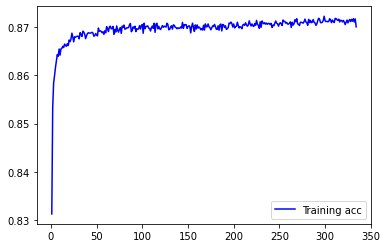

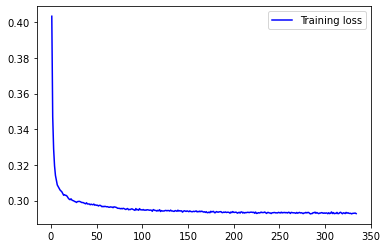

In [5]:
tr_df = pd.read_csv(input_dir+"6hr_{}_commonFs.csv".format(
    data_name))
tr_x, tr_y = fun1.df_xy(tr_df)

model_nn = create_keras_model(tr_x)
model_nn.compile(optimizer = optimizers.RMSprop(lr=1e-3), 
                 loss = 'binary_crossentropy', 
                 metrics = ['accuracy'])   

history = model_nn.fit(tr_x, tr_y, 
                       batch_size = bs, 
                       epochs = epo_num, 
                       verbose = 0, 
                       callbacks=[callback])
fun1.plot_training_process(history)

model_nn.save("predict_6hr_trained_models/{}_im_{}.h5".format(
    data_name, model_types))